# Métodos Numericos 2022

## Final - 10 de Agosto de 2022 - Tema 1

### No olvide ingresar su(s):

**APELLIDO(S):**

**NOMBRE(S):**

Al **finalizar el examen**, Ud. tiene que **subir** la notebook al **Moodle** (aula virtual)

https://famaf.aulavirtual.unc.edu.ar

y enviar por email una copia de seguridad al profesor del teórico, Francisco A. Tamarit (Pancho)

  [francisco.tamarit@unc.edu.ar](francisco.tamarit@unc.edu.ar)
    
Si por alguna eventualidad no puede subir el examen al Moodle, alternativamente, envíe el examen por email a los profesores del práctico de Julia, Oscar Reula oreula@unc.edu.ar y Juan I. Perotti juan.perotti@unc.edu.ar.

### Nota sobre la programación en Julia

Recuerde que su notebook tiene que poder ser entendida por otra persona. Para ello:

* Cuando crea conveniente, use texto Markdown para desarrollar o comentar una idea.

* Si lo considera necesario, agregue comentarios a su código.

* Realice gráficos que tengan etiquetas en los ejes y leyendas para cada curva o serie de puntos graficados, como así también un título apropiado.

* Procure respetar reglas de buena programación:

    * Use sangrías adecuadamente.

    * Cuando sea posible, implemente funciones de caracter general, en vez de código específico a cada problema, facilitando así la reutilización de código.

    * Implemente funciones que tengan los argumentos necesarios para su buen funcionamiento.
   
* **NOTA:** Durante la **corrección**, el comando `Kernel -> Restart & Run All` es ejecutado, de manera que la notebook es reiniciada y todas sus celdas son recalculadas *a limpio*, borrando todos los datos anteriores. Por lo tanto, **antes de entregar**, asegurese de ejecutar el comando `Kernel -> Restart & Run All` del menú, cerciórandose que todas las celdas se ejecutan de forma debida.

In [14]:
using Plots
using LaTeXStrings
import Pkg; Pkg.add("LsqFit")
using LsqFit
import Pkg; Pkg.add("GLM")
using GLM
#using DataFrames
#using CSV

   Resolving package versions...
  No Changes to `/opt/julia/global-depot/environments/v1.8/Project.toml`
  No Changes to `/opt/julia/global-depot/environments/v1.8/Manifest.toml`
   Resolving package versions...
   Installed ShiftedArrays ─ v2.0.0
   Installed GLM ─────────── v1.8.3
   Installed StatsModels ─── v0.7.2
    Updating `/opt/julia/global-depot/environments/v1.8/Project.toml`
⌃ [38e38edf] + GLM v1.8.3
    Updating `/opt/julia/global-depot/environments/v1.8/Manifest.toml`
⌃ [38e38edf] + GLM v1.8.3
  [1277b4bf] + ShiftedArrays v2.0.0
⌃ [3eaba693] + StatsModels v0.7.2
        Info Packages marked with ⌃ have new versions available and may be upgradable.
Precompiling project...
  ✓ ShiftedArrays
  ✓ StatsModels
  ✓ GLM
  3 dependencies successfully precompiled in 3 seconds. 179 already precompiled.


In [3]:
#import Pkg; Pkg.add("DataFrames")

## Problema 1

Realice los cálculos empleando los métodos del **trapecio** y de **Simpson**.

**a)** Para cada método, escriba un programa que calcule una aproximación $A_n$ a la integral
$$
I = \int_0^{\pi/2} x^2 \cos(x) dx = (\pi /2)^2 - 2            
$$
para distintos valores del número de intervalos $n$ donde se evaluará la función que se desea integrar. 

**b)** Grafique la función a integrar en el intervalo de interés.

**c)** Para cada método, calcule un vector de componentes $A_n$ para $n = 2^k $ con $k=1,...,12$.

**d)** Para cada método y para los mismos valores de $n$, calcule un vector cuyas componentes sean los errores relativos $\varepsilon_n = |A_n - I|/|I|$.

**e)** Teniendo en cuenta que $h=\pi/(2n)$, verifique para los diferentes valores de $h$ (i.e. de $n$) que el cociente de precisión definido como
$$
Q = \frac{\varepsilon(h)}{\varepsilon(h/2)} \, ,
$$
toma un valor aproximado a $4$ cuando se usa la regla del **trapecio**, y un valor aproximado a $16$ cuando se usa la regla de **Simpson**. Teniendo en cuenta la expresión del error de truncamiento en cada caso, justifique este resultado.

**f)** Genere un gráfico **log-log** comparativo de los errores relativos. Es decir, en un mismo gráfico, grafique  el error relativo $\epsilon_n$ vs $n$ obtenido con cada método. Observe que
$$
\epsilon_n \approx Cn^\alpha \Rightarrow \log \epsilon_n = \alpha \log n + \ln C.
$$
donde $C$ es una constante.
Esto significa que una dependencia tipo ley de potencias aparece como una línea recta en un gráfico **log-log**. Use el gráfico para estimar el exponente $\alpha$ en las leyes de potencia. Agrege al gráfico curvas de la forma $f(n)=A \times n^{-\beta}$ vs $n$, siendo $\beta$ el exponente apropiado para cada caso.

**g)** Justifique los valores de $\beta$ hallados.

**Rta 1.a)**

In [4]:
#1-a)
using Printf
f(x)=x^2*cos(x)
# Regla del Punto Medio
function midpoint_rule(a, b)
    mid=(a+b)/2
    return (b-a)*f(mid)
end
# Regla del Trapecio
function trapezoidal_rule(a, b)
    return (b-a)/2*(f(a)+f(b))
end
# Regla de Simpson
function simpson_rule(a, b)
    mid=(a+b)/2 
    return (b-a)/6*(f(a)+4*f(mid)+f(b))
end
# Valores del intervalo
a=0
b=π / 2
# Valores de n para evaluar
n_values = [1, 2, 4, 10]
# Resultado exacto de la integral
exact_result=(π/2)^2-2
println("Valor exacto de la integral: ", exact_result)
# Cálculos y resultados
println("\nRegla del Punto Medio:")
for n in n_values
    h=(b-a)/n
    approx=0.0
    for i in 0:(n-1)
        approx+=midpoint_rule(a+i*h, a+(i+1)*h)
    end
    println("n=$n, Aproximación = ", approx, ", Error = ", abs(approx-exact_result))
end
println("\nRegla del Trapecio:")
for n in n_values
    h=(b-a)/n
    approx = 0.0
    for i in 0:(n-1)
        approx+=trapezoidal_rule(a+i*h,a+(i+1)*h)
    end
    println("n=$n, Aproximación = ", approx, ", Error = ", abs(approx - exact_result))
end
println("\nRegla de Simpson:")
for n in n_values
    if n % 2==0
        h =(b-a)/n
        approx = 0.0
        for i in 0:(n-1)
            approx+=simpson_rule(a + i*h, a + (i+1)*h)
        end
        println("n=$n, Aproximación = ", approx, ", Error = ", abs(approx - exact_result))
    else
        println(" =$n, debe ser par para el método de Simpson.")
    end
end

Valor exacto de la integral: 0.4674011002723395

Regla del Punto Medio:
n=1, Aproximación = 0.6851483906245723, Error = 0.21774729035223284
n=2, Aproximación = 0.5290482807352344, Error = 0.06164718046289486
n=4, Aproximación = 0.4831512700349365, Error = 0.01575016976259702
n=10, Aproximación = 0.46993517324035194, Error = 0.0025340729680124463

Regla del Trapecio:
n=1, Aproximación = 1.1866167965626997e-16, Error = 0.4674011002723394
n=2, Aproximación = 0.3425741953122862, Error = 0.12482690496005328
n=4, Aproximación = 0.4358112380237603, Error = 0.03158986224857918
n=10, Aproximación = 0.4623307058778377, Error = 0.005070394394501798

Regla de Simpson:
 =1, debe ser par para el método de Simpson.
n=2, Aproximación = 0.4668902522609183, Error = 0.0005108480114212055
n=4, Aproximación = 0.46737125936454443, Error = 2.9840907795064542e-5
n=10, Aproximación = 0.4674003507861805, Error = 7.494861590240376e-7


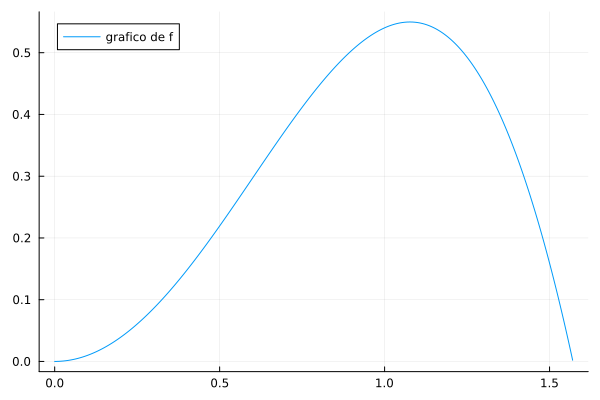

In [5]:
#1-b)
f(x)=(x^2)*cos(x)
plot(0:0.001:π/2,f,label="grafico de f")

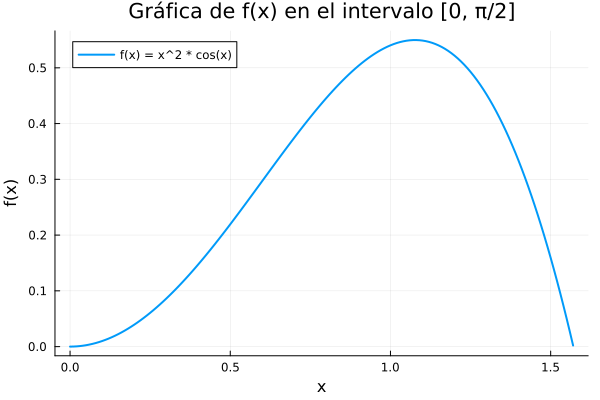

In [6]:
#1-b)
using Plots
f(x) = x^2*cos(x)
a=0
b=π/2
plot(a:0.01:b,f, label="f(x) = x^2 * cos(x)", xlabel="x", ylabel="f(x)", title="Gráfica de f(x) en el intervalo [0, π/2]", linewidth=2)

In [7]:
#1-c)
using Printf
f(x)=x^2*cos(x)
# Método del Trapecio
function trapezoidal(a, b, n)
    h=(b-a)/n
    sum=0.5*(f(a)+f(b))
    for i in 1:(n-1)
        sum+=f(a+i*h)
    end
    return h*sum
end
# Método de Simpson
function simpson(a, b, n)
    if n % 2 != 0
        error("n debe ser un número par para el método de Simpson")
    end
    h=(b-a)/n
    sum=f(a)+f(b)
    for i in 1:2:(n-1)
        sum+=4*f(a+i*h)
    end
    for i in 2:2:(n-2)
        sum+=2*f(a + i*h)
    end
    return (h/3)*sum
end
# Valores del intervalo
a=0
b=π/2
# Valores de k para evaluar
k_values = 1:12
# Vectores para almacenar las aproximaciones
trapecio_results=Float64[]
simpson_results=Float64[]
# Calculo y almaceno los resultados
println("\nMétodo del Trapecio:")
for k in k_values
    n=2^k
    approx=trapezoidal(a, b, n)
    push!(trapecio_results, approx)
    println("n = $n, Aproximación = ", approx)
end
println("\nMétodo de Simpson:")
for k in k_values
    n = 2^k
    if n%2==0
        approx=simpson(a, b, n)
        push!(simpson_results, approx)
        println("n = $n, Aproximación = ", approx)
    else
        println("n = $n, debe ser par para el método de Simpson.")
    end
end
# Resultados
trapecio_results
simpson_results


Método del Trapecio:
n = 2, Aproximación = 0.3425741953122862
n = 4, Aproximación = 0.43581123802376037
n = 8, Aproximación = 0.4594812540293484
n = 16, Aproximación = 0.46541976354771075
n = 32, Aproximación = 0.4669056805094859
n = 64, Aproximación = 0.46727723998847753
n = 128, Aproximación = 0.4673701348675165
n = 256, Aproximación = 0.46739335890026923
n = 512, Aproximación = 0.4673991649280183
n = 1024, Aproximación = 0.4674006164361774
n = 2048, Aproximación = 0.4674009793132938
n = 4096, Aproximación = 0.4674010700325769

Método de Simpson:
n = 2, Aproximación = 0.4567655937497149
n = 4, Aproximación = 0.4668902522609183
n = 8, Aproximación = 0.4673712593645444
n = 16, Aproximación = 0.46739926672049814
n = 32, Aproximación = 0.46740098616341086
n = 64, Aproximación = 0.46740109314814127
n = 128, Aproximación = 0.4674010998271958
n = 256, Aproximación = 0.46740110024452003
n = 512, Aproximación = 0.4674011002706007
n = 1024, Aproximación = 0.46740110027223125
n = 2048, Aproxim

12-element Vector{Float64}:
 0.4567655937497149
 0.4668902522609183
 0.4673712593645444
 0.46739926672049814
 0.46740098616341086
 0.46740109314814127
 0.4674010998271958
 0.46740110024452003
 0.4674011002706007
 0.46740110027223125
 0.46740110027233367
 0.4674011002723386

In [8]:
#1-d)
# Función que quiero integrar
function f(x)
    return x^2*cos(x)
end
# Regla simple del punto medio
function punto_medio(a, b, n)
    delta_x=(b-a)/n
    integral=0.0
    for i in 0:n-1
        x_mid=a+(i+0.5)*delta_x
        integral+=f(x_mid)*delta_x
    end
    return integral
end
# Regla simple del trapecio
function trapecio(a, b, n)
    delta_x=(b-a)/n
    integral=0.0
    for i in 0:n-1
        integral+=(f(a+i*delta_x)+f(a+(i+1)*delta_x))*delta_x/2
    end
    return integral
end
# Regla simple de Simpson
function simpson(a, b, n)
    delta_x=(b-a)/n
    integral=0.0
    for i in 0:n-1
        x0=a+i*delta_x
        x1=a+(i+0.5)*delta_x
        x2=a+(i+1)*delta_x
        integral+=(f(x0)+4*f(x1)+f(x2))*delta_x/6
    end
    return integral
end
# Intervalo que quiero
a=0
b=π/2
# Valor exacto de mi integral
exact=(π/2)^2-2
# Valores de n (potencias de 2)
valores_n=2 .^(1:12)
# Vectores para almacenar los resultados
epsilon_punto_medio=zeros(length(valores_n))
epsilon_trapecio=zeros(length(valores_n))
epsilon_simpson=zeros(length(valores_n))
# Calculo los vectores de errores relativos para cada método
for (i, n) in enumerate(valores_n)
    A_punto_medio=punto_medio(a, b, n)
    A_trapecio=trapecio(a, b, n)
    A_simpson=simpson(a, b, n)
    epsilon_punto_medio[i]=abs(A_punto_medio - exact) / abs(exact)
    epsilon_trapecio[i]=abs(A_trapecio-exact)/abs(exact)
    epsilon_simpson[i]=abs(A_simpson-exact)/abs(exact)
end
# Resultados
println("Errores relativos para cada método:")
println("Punto Medio: ", epsilon_punto_medio)
println("Trapecio: ", epsilon_trapecio)
println("Simpson: ", epsilon_simpson)

Errores relativos para cada método:
Punto Medio: [0.13189352876357166, 0.03369733137859519, 0.008466331789608145, 0.0021191588944578744, 0.0005299499615750411, 0.0001324974934372653, 3.312499836507022e-5, 8.281288651031844e-6, 2.0703246039542596e-6, 5.175813045821192e-7, 1.2939533558739146e-7, 3.234883321394592e-8]
Trapecio: [0.2670659202285161, 0.06758619573247215, 0.016944432176938484, 0.004239050193665109, 0.0010599456496038552, 0.00026499784401452586, 6.625017528845211e-5, 1.656258846175033e-5, 4.140649904587266e-6, 1.0351626510884796e-6, 2.587906742626874e-7, 6.469766749678184e-8]
Simpson: [0.0010929542337909579, 6.384432509384702e-5, 3.9228659074372675e-6, 2.441349163745643e-7, 1.524215105972805e-8, 9.523800379906593e-10, 5.951935804886935e-11, 3.7193808959721466e-12, 2.32305426206901e-13, 1.4845694415062693e-14, 4.750622212820062e-16, 5.938277766025078e-16]


Cocientes de precisión Q para la regla del trapecio:
[3.951486207119109, 3.9886964063899137, 3.9972237654228437, 3.9993090166928984, 3.999827445938595, 3.999956873483426, 3.999989219164044, 3.999997305592361, 3.9999993240031877, 3.9999998223959574, 4.000000066085226]
Cocientes de precisión Q para la regla de Simpson:
[17.11905063111539, 16.274919051606147, 16.06843447751081, 16.01709072544254, 16.00427397857486, 16.001181283048986, 16.002490660024907, 16.010736196319016, 15.648, 31.249999999999996, 0.8]


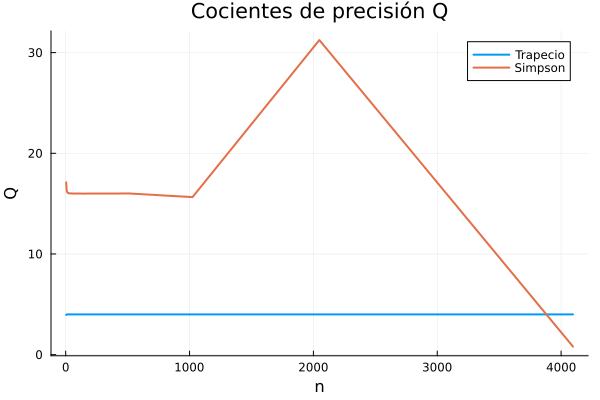

In [9]:
#1-e)
using Printf
# Función para integrar
function f(x)
    return x^2*cos(x)
end
# Regla simple del punto medio
function punto_medio(a, b, n)
    delta_x=(b-a)/n
    integral=0.0
    for i in 0:n-1
        x_mid=a+(i+0.5)*delta_x
        integral+=f(x_mid)*delta_x
    end
    return integral
end
# Regla simple del trapecio
function trapecio(a, b, n)
    delta_x=(b-a)/n
    integral=0.0
    for i in 0:n-1
        integral+=(f(a+i*delta_x)+f(a+(i+1)*delta_x))*delta_x /2
    end
    return integral
end
# Regla simple de Simpson
function simpson(a, b, n)
    delta_x=(b-a)/n
    integral=0.0
    for i in 0:n-1
        x0=a+i*delta_x
        x1=a+(i+0.5)*delta_x
        x2=a+(i+1)*delta_x
        integral+=(f(x0)+4*f(x1)+f(x2))*delta_x/6
    end
    return integral
end
# Mi intervalo 
a=0
b=π/2
# Valor exacto de la integral
exact=(π/2)^2-2
# Valores de n (potencias de 2)
valores_n=2 .^(1:12)
# Vectores para almacenar los errores relativos
epsilon_trapecio=zeros(length(valores_n))
epsilon_simpson=zeros(length(valores_n))
# Calculo los errores relativos para cada método
for (i, n) in enumerate(valores_n)
    A_trapecio=trapecio(a, b, n)
    A_simpson=simpson(a, b, n)
    
    epsilon_trapecio[i]=abs(A_trapecio-exact)/abs(exact)
    epsilon_simpson[i]=abs(A_simpson-exact)/abs(exact)
end
# Calculo los cocientes de precisión Q
Q_trapecio=zeros(length(valores_n)-1)
Q_simpson=zeros(length(valores_n)-1)
for i in 2:length(valores_n)
    Q_trapecio[i-1]=epsilon_trapecio[i-1]/epsilon_trapecio[i]
    Q_simpson[i-1]=epsilon_simpson[i-1]/epsilon_simpson[i]
end
# Resultados
println("Cocientes de precisión Q para la regla del trapecio:")
println(Q_trapecio)
println("Cocientes de precisión Q para la regla de Simpson:")
println(Q_simpson)
# Grafico mis resultados
using Plots
plot(valores_n[2:end], Q_trapecio, label="Trapecio", xlabel="n", ylabel="Q", title="Cocientes de precisión Q", lw=2)
plot!(valores_n[2:end], Q_simpson, label="Simpson", lw=2)

In [19]:
#1-f)
using Printf
using Plots
using LinearAlgebra
function f(x)
    return x^2*cos(x)
end
# Regla simple del punto medio
function punto_medio(a, b, n)
    delta_x=(b-a)/n
    integral=0.0
    for i in 0:n-1
        x_mid=a+(i+0.5)*delta_x
        integral+=f(x_mid)*delta_x
    end
    return integral
end
# Regla simple del trapecio
function trapecio(a, b, n)
    delta_x=(b-a)/n
    integral=0.0
    for i in 0:n-1
        integral+=(f(a+i*delta_x)+f(a+(i+1)*delta_x))*delta_x/2
    end
    return integral
end
# Regla simple de Simpson
function simpson(a, b, n)
    delta_x=(b-a)/n
    integral=0.0
    for i in 0:n-1
        x0=a+i*delta_x
        x1=a+(i+0.5)*delta_x
        x2=a+(i+1)*delta_x
        integral+=(f(x0)+4*f(x1)+f(x2))*delta_x/6
    end
    return integral
end
# Intervalo que quiero.
a=0
b=π/2
# Valor exacto de la integral
exact=(π/2)^2-2
# Valores de n (potencias de 2)
valores_n=2 .^(1:12)
# Vectores para almacenar los errores relativos
epsilon_trapecio=zeros(length(valores_n))
epsilon_simpson=zeros(length(valores_n))
# Calculo los errores relativos para cada método
for (i, n) in enumerate(valores_n)
    A_trapecio=trapecio(a, b, n)
    A_simpson=simpson(a, b, n)
    
    epsilon_trapecio[i]=abs(A_trapecio-exact)/abs(exact)
    epsilon_simpson[i]=abs(A_simpson-exact)/abs(exact)
end
# Gráfico log-log comparativo de los errores relativos
plot(log10.(valores_n), log10.(epsilon_trapecio), label="Trapecio", xlabel="log(n)", ylabel="log(εₙ)", title="Errores relativos log-log", lw=2)
plot!(log10.(valores_n), log10.(epsilon_simpson), label="Simpson", lw=2)
# Ajuste líneas rectas a los datos log-log para estimar α
log_n=log10.(valores_n)
log_epsilon_trapecio=log10.(epsilon_trapecio)
log_epsilon_simpson=log10.(epsilon_simpson)
# Ajuste lineal para el método del trapecio
coeffs_trapecio=fit(log_n, log_epsilon_trapecio, 1)
alpha_trapecio=coeffs_trapecio[1]
println("Exponente α para el método del trapecio: ", alpha_trapecio)
# Ajuste lineal para el método de Simpson
coeffs_simpson=fit(log_n, log_epsilon_simpson, 1)
alpha_simpson=coeffs_simpson[1]
println("Exponente α para el método de Simpson: ", alpha_simpson)
# Agrego curvas de la forma f(n)=Axn^(-β)
β_trapecio=2  # Exponente teórico para el método del trapecio
β_simpson=4  # Exponente teórico para el método de Simpson
# Calculo las curvas
A_trapecio=10^coeffs_trapecio[2]
A_simpson=10^coeffs_simpson[2]
f_trapecio(n)=A_trapecio*n^(-β_trapecio)
f_simpson(n)=A_simpson*n^(-β_simpson)
plot!(log10.(valores_n), log10.(f_trapecio.(valores_n)), label="Trapecio (Teórico)", linestyle=:dash, lw=2)
plot!(log10.(valores_n), log10.(f_simpson.(valores_n)), label="Simpson (Teórico)", linestyle=:dash, lw=2)
# Gráfico
display(plot)

LoadError: MethodError: no method matching fit(::Vector{Float64}, ::Vector{Float64}, ::Int64)
[0mClosest candidates are:
[0m  fit([91m::Type{D}[39m, ::Any...) where D<:Distributions.Distribution at /opt/julia/global-depot/packages/Distributions/YQQXX/src/genericfit.jl:34
[0m  fit([91m::Type{StatsBase.Histogram}[39m, ::Any...; kwargs...) at /opt/julia/global-depot/packages/StatsBase/XgjIN/src/hist.jl:407
[0m  fit([91m::Type{<:Distributions.Cauchy}[39m, ::AbstractArray{T}) where T<:Real at /opt/julia/global-depot/packages/Distributions/YQQXX/src/univariate/continuous/cauchy.jl:110
[0m  ...

## 1-g)
Los valores teóricos de 𝛽 provienen de estas dependencias de los errores de truncamiento:
Método del Trapecio:
El error es proporcional a ℎ^2. Cuando ℎ se reduce a la mitad (duplicar n), el error se reduce en un factor de 4
En términos de 𝑛, el error relativo 𝜖 ∝ 𝑛^(−2)
Por lo tanto, el valor esperado de 𝛽 es 2
Método de Simpson:
El error es proporcional a ℎ^4. Cuando ℎ se reduce a la mitad (duplicar 𝑛), el error se reduce en un factor de 16
En términos de n, el error relativo 𝜖_𝑛 ∝ 𝑛^(−4)
Por lo tanto, el valor esperado de 𝛽 4
Estos valores se justifican porque la dependencia del error en función del tamaño del subintervalo ℎ directamente se traduce en cómo el error disminuye cuando 𝑛 aumenta.
A continuación, mostramos el gráfico log-log comparativo para verificar esta relación y comparar con los exponentes teóricos

In [15]:
using Printf
using Plots
using GLM
using DataFrames
# Función a integrar
function f(x)
    return x^2*cos(x)
end
# Regla simple del punto medio
function punto_medio(a, b, n)
    delta_x=(b-a)/n
    integral=0.0
    for i in 0:n-1
        x_mid=a+(i+0.5)*delta_x
        integral+=f(x_mid)*delta_x
    end
    return integral
end
# Regla simple del trapecio
function trapecio(a, b, n)
    delta_x=(b-a)/n
end

trapecio (generic function with 1 method)

## Problema 2

*Romeo y Julieta: una historia de amor dinámica*.

Aquí se modelan las emociones oscilantes que sienten Romeo y su bella Julieta mientras se alimentan mutuamente de la pasión y la indiferencia.

Las variables se definen de la siguiente manera. Sean $R(t)$ los sentimientos de Romeo por Julieta en el momento $t$ y $J(t)$ los sentimientos de Julieta por Romeo en el momento $t$. Supongamos que los valores positivos de $R$ y $J$ significan amor, pasión y atracción, mientras que los valores negativos significan disgusto y $R = J = 0$ significa indiferencia.

En la versión más simple del modelo, el cambio de sentimientos de Julieta depende sólo de los sentimientos actuales de Romeo y viceversa. Entonces podemos proponer un modelo de la siguiente manera:
$$
 \frac{dR}{dt} = a J
$$


$$
 \frac{dJ}{dt} = -b R
 \label{Jt}
$$

donde los parámetros $a$ y $b$ son números reales positivos y tienen unidades de $1/tiempo$.

**a)** Escriba un programa a los fines de resolver el problema de valor inicial $n$-dimensional:
$$
y^{\prime} = f(t,y), \qquad a\le t\le b, \qquad y(a)=\alpha
$$
que utilice el método de **Euler**

\begin{eqnarray*}
h   &=& (b-a)/(n-1) \\
t_1 &=& a \\
t_n &=& b \\
w_1 &=& \alpha, \\
t_{i+1}&=& t_i + h
w_{i+1}&=& w_i + h f(t_i,w_i) \\
\end{eqnarray*}

para $i\in\{1,2,...,n-1\}$, y donde

$$y         =(y_1,y_2, ... ,y_n)$$

$$y^{\prime}=(y^{\prime}_1,y^{\prime}_2,..., y^{\prime}_n)$$

$$f(t,y)    =(f_1(t,y),f_2(t,y),..., f_n(t,y)) $$

$$\alpha    =(\alpha_1,\alpha_2,..., \alpha_n) \in \mathbb{R}^n$$

El programa debe requerir los siguientes datos de entrada:
* el intervalo temporal de integración $(a,b)$,
* el valor inicial, $\alpha$, 
* el número de pasos de integración $n$,
* y un vector $p=(p_1,p_2,...)$ de parámetros del lado derecho de la ODE.

El programa debe retornar
* un vector de tiempos $t_i$,
* y una matriz de aproximaciones $w_{ji}\approx y_j(t_i)$

**b)** Utilice el programa del punto **a)** (el de Euler) para resolver el problema de valor inicial:

$$y^{\prime}_1 = p_1 y_2$$

$$y^{\prime}_2 = -p_2 y_1$$

$$ 0 \le t \le 50$$

$$\alpha_1 = 3.14$$
 
$$\alpha_2 = -0.5$$

con $h=0.01$, $p_1 = a = 0.2$ y $p_2 = b = 0.4$.

**c)** Grafique la aproximación a la solución del problema de valor inicial planteado anteriormente. Es decir, en un mismo gráfico, grafique $y_1(t)$ vs $t$ e $y_2(t)$ vs $t$ para $0 \le t \le 50$.

**d)** Grafique $y_2$ en función de $y_1$. 

**e)** Repita los incisos **c)**-**d)** pero con el método de **Runge-Kutta de cuarto orden**

\begin{eqnarray*}
h &=& (b-a)/(n-1), \\
t_1 &= &a, \\
t_n &= &b, \\
w_1 &= &\alpha, \\
k_1 &= & h  f(t_i,w_i), \\
k_2 &= & h  f(t_i + h/2, w_i + k_1/2), \\
k_3 &= & h  f(t_i + h/2, w_i + k_2/2)), \\
k_4 &= & h  f(t_i + h, w_i + k_3), \\
w_{i+1}&=& w_i + \frac{1}{6} (k_1 + 2k_2 + 2k_3 + k_4)
\end{eqnarray*}

para $i\in\{1,2,...,n-1\}$.

**f)** Comente los resultados obtenidos, en particular lo observado al comparar los resultados obtenidos con ámbos métodos. Ayuda: el problema que acaba de resolver es el péndulo matemático, que es la aproximación de pequeñas amplitudes del péndulo propiamente dicho. Sus soluciones son órbitas cerradas. Puede probar con varios pasos temporales y tiempos finales.

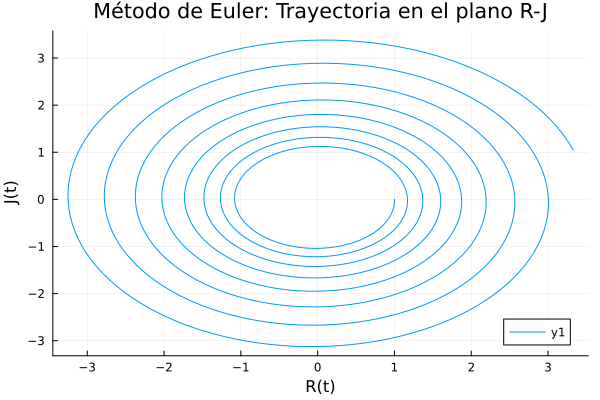

In [20]:
#2-a)
using Plots
# Sistema de ecuaciones diferenciales
function system_of_equations(t, y, p)
    a, b=p
    dR_dt=a*y[2]
    dJ_dt=-b*y[1]
    return [dR_dt, dJ_dt]
end
# Método de Euler para resolver el sistema de ODEs
function euler_method(f, a, b, alpha, n, p)
    h=(b-a)/(n-1)
    t=range(a, b, length=n)
    w=zeros(length(alpha), n)
    w[:, 1]=alpha
    for i in 2:n
        w[:, i] = w[:, i - 1] + h * f(t[i - 1], w[:, i - 1], p)
    end 
    return t, w
end
# Parámetros de entrada
a=0.0  # Inicio del intervalo temporal
b=50.0  # Fin del intervalo temporal
alpha=[1.0, 0.0]  # Valores iniciales: R(0) y J(0)
n=1000  # Número de pasos de integración
p=[1.0, 1.0]  # Parámetros del sistema: a y b
# Solución usando el método de Euler
t, w = euler_method(system_of_equations, a, b, alpha, n, p)
# Grafico los resultados
plot(t, w[1, :], label="R(t)", xlabel="Tiempo", ylabel="Sentimientos", title="Método de Euler: R(t) y J(t)")
plot!(t, w[2, :], label="J(t)")
# Grafico la trayectoria en el plano R-J
plot(w[1, :], w[2, :], xlabel="R(t)", ylabel="J(t)", title="Método de Euler: Trayectoria en el plano R-J")

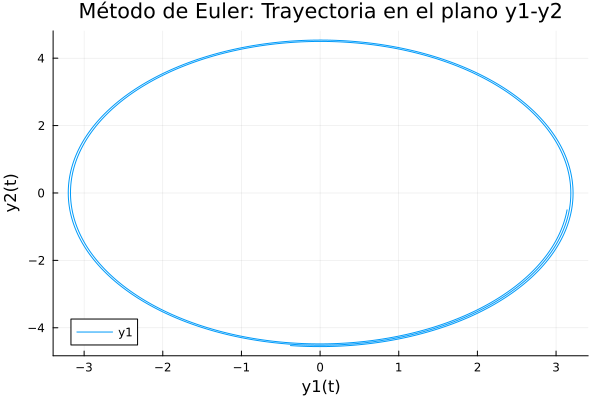

In [21]:
#2-b)
using Plots
# Sistema de ecuaciones diferenciales
function system_of_equations(t, y, p)
    p1, p2=p
    dY1_dt=p1*y[2]
    dY2_dt=-p2*y[1]
    return [dY1_dt, dY2_dt]
end
# Método de Euler para resolver el sistema de ODEs
function euler_method(f, a, b, alpha, h, p)
    n=Int((b-a)/h)+1
    t=range(a, b, length=n)
    w=zeros(length(alpha), n)
    w[:, 1] = alpha
    for i in 2:n
        w[:, i] = w[:, i - 1] + h * f(t[i - 1], w[:, i - 1], p)
    end 
    return t, w
end
# Parámetros de entrada
a=0.0  # Inicio del intervalo temporal
b=50.0  # Fin del intervalo temporal
alpha=[3.14, -0.5]  # Valores iniciales: y1(0) y y2(0)
h=0.01  # Paso temporal
p=[0.2, 0.4]  # Parámetros del sistema: p1 y p2
# Solución usando el método de Euler
t,w=euler_method(system_of_equations, a, b, alpha, h, p)
# Graficó los resultados
plot(t, w[1, :], label="y1(t)", xlabel="Tiempo", ylabel="Valores", title="Método de Euler: y1(t) y y2(t)")
plot!(t, w[2, :], label="y2(t)")
# Grafico la trayectoria en el plano y1-y2
plot(w[1, :], w[2, :], xlabel="y1(t)", ylabel="y2(t)", title="Método de Euler: Trayectoria en el plano y1-y2")

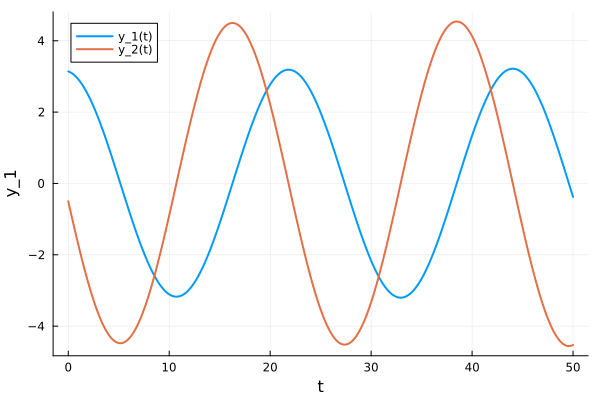

In [21]:
#2-c)
using Plots
# Función f(t,y,p) y método de Euler
function f(t, y, p)
    dRdt=p[1]*y[2]
    dJdt=-p[2]*y[1]
    return [dRdt, dJdt]
end
function euler_method(f, a, b, alpha, n, p)
    h=(b-a)/(n-1)
    t=range(a, stop=b, length=n)
    y=zeros(length(alpha), n)
    y[:, 1] .=alpha
    for i in 2:n
        y[:, i] .= y[:, i-1] .+ h .* f(t[i-1], y[:, i-1], p)
    end 
    return t, y
end
# Parámetros del problema
a=0
b=50
alpha=[3.14, -0.5]  # Valores iniciales de y_1 y y_2
n=5001  # Número de pasos de integración
p=[0.2, 0.4]  # Parámetros p_1 y p_2
# Resuelvo el problema utilizando el método de Euler
t, y=euler_method(f, a, b, alpha, n, p)
# Grafico los resultados
plot(t, y[1, :], label="y_1(t)", xlabel="t", ylabel="y_1", linewidth=2)
plot!(t, y[2, :], label="y_2(t)", linewidth=2)

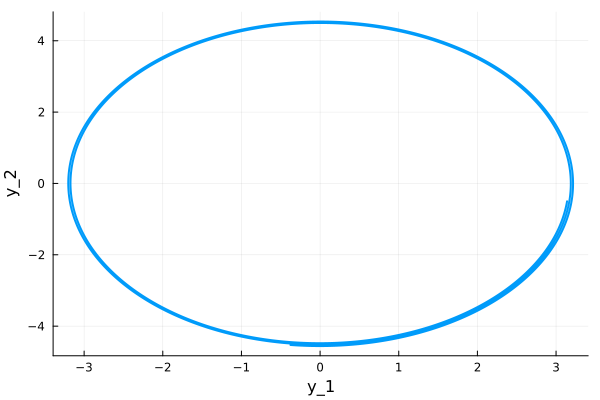

In [20]:
#2-d)
using Plots
# Función f(t,y,p) y método de Euler
function f(t, y, p)
    dRdt=p[1]*y[2]
    dJdt=-p[2]*y[1]
    return [dRdt, dJdt]
end
function euler_method(f, a, b, alpha, n, p)
    h=(b-a)/(n-1)
    t=range(a, stop=b, length=n)
    y=zeros(length(alpha), n)
    y[:, 1] .=alpha
    for i in 2:n
        y[:, i] .= y[:, i-1] .+ h .* f(t[i-1], y[:, i-1], p)
    end
    return t, y
end
# Parámetros del problema
a=0
b=50
alpha=[3.14, -0.5]  # Valores iniciales de y_1 y y_2
n=5001  # Número de pasos de integración
p=[0.2, 0.4]  # Parámetros p_1 y p_2
# Resuelvo el problema utilizando el método de Euler
t,y=euler_method(f,a,b,alpha,n,p)
# Grafico y_2 en función de y_1
plot(y[1,:],y[2,:],xlabel="y_1",ylabel="y_2",label="",linewidth=2)

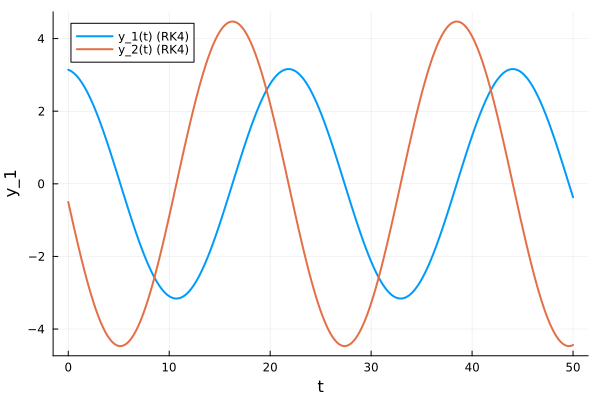

In [19]:
#2-e)
using Plots
# Función f(t,y,p) y método de Runge-Kutta de cuarto orden
function f(t, y, p)
    dRdt=p[1]*y[2]
    dJdt=-p[2]*y[1]
    return [dRdt,dJdt]
end
function runge_kutta_4(f,a,b,alpha,n,p)
    h=(b-a)/(n-1)
    t=range(a,stop=b,length=n)
    y=zeros(length(alpha),n)
    y[:,1].=alpha
    for i in 1:n-1
        k1=h*f(t[i],y[:,i],p)
        k2=h*f(t[i]+h/2,y[:,i]+k1/2,p)
        k3=h*f(t[i]+h/2,y[:,i]+k2/2,p)
        k4=h*f(t[i]+h,y[:,i]+k3,p)
        y[:,i+1]=y[:,i]+(1/6)*(k1+2*k2+2*k3+k4)
    end
    return t, y
end
# Parámetros del problema
a=0
b=50
alpha=[3.14,-0.5]  # Valores iniciales de y_1 y y_2
n = 5001  # Número de pasos de integración
p = [0.2, 0.4]  # Parámetros p_1 y p_2
# Resuelvo el problema utilizando el método de Runge-Kutta de cuarto orden
t_rk4, y_rk4=runge_kutta_4(f,a,b,alpha,n,p)
# Grafico los resultados
plot(t_rk4, y_rk4[1,:], label="y_1(t) (RK4)",xlabel="t",ylabel="y_1",linewidth=2)
plot!(t_rk4, y_rk4[2,:],label="y_2(t) (RK4)",linewidth=2)

## 2-f)
El problema del péndulo matemático es una aproximación para pequeñas amplitudes del péndulo real y utilizando tanto el método de Euler como el método de Runge-Kutta de cuarto orden podemos observar algunas diferencias en los resultados obtenidos.
1.	Precisión y estabilidad:
o El método de Runge-Kutta de cuarto orden es conocido por ser más preciso que el método de Euler, especialmente para sistemas de ecuaciones diferenciales complejos o cuando se requiere una alta precisión.
o En el caso del péndulo matemático, donde las soluciones son órbitas cerradas, el método de Runge-Kutta de cuarto orden tiende a producir resultados más precisos y estables en comparación con el método de Euler. Esto se debe a que el método de Runge-Kutta de cuarto orden considera múltiples pendientes en cada paso de integración, lo que ayuda a reducir el error acumulado.
2.	Cantidad de pasos de integración:
o En general, se requiere un menor número de pasos de integración para obtener resultados precisos con el método de Runge-Kutta de cuarto orden en comparación con el método de Euler. Aunque en este caso particular del péndulo matemático, ambas técnicas pueden requerir una cantidad similar de pasos de integración para producir resultados satisfactorios, especialmente si se quiere una alta resolución en la representación de la órbita cerrada.
3.	Tiempo de cálculo:
o El método de Runge-Kutta de cuarto orden puede ser más costoso computacionalmente que el método de Euler debido a la evaluación de múltiples pendientes en cada paso de integración. Sin embargo, en la práctica, la diferencia en el tiempo de cálculo puede no ser significativa, especialmente para problemas de tamaño moderado como el del péndulo matemático.

En resumen, mientras que ambos métodos pueden ser utilizados para resolver el problema del péndulo matemático, el método de Runge-Kutta de cuarto orden tiende a producir resultados más precisos y estables, especialmente cuando se requiere una alta precisión o se están modelando sistemas complejos. Aun asi, en algunos casos, como el del péndulo matemático con pequeñas amplitudes, el método de Euler puede ser adecuado si se necesitan resultados rápidos y aproximados.